<a href="https://colab.research.google.com/github/MingxiaWu/jupyterlab/blob/main/ML_Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Experiment with different values of the regularization parameter

C and the kernel coefficient γ (gamma) for the SVM with the RBF kernel. Adjusting these parameters can significantly impact the decision boundaries and overall model performance.
Train SVM Models with varying values of C and gamma.  Plot Decision Regions for each combination of C and γ to visualize how they affect the model.
Evaluate the Models: Assess the models based on decision regions and test set accuracy.
 Data:  Iris Dataset (use the first two features).


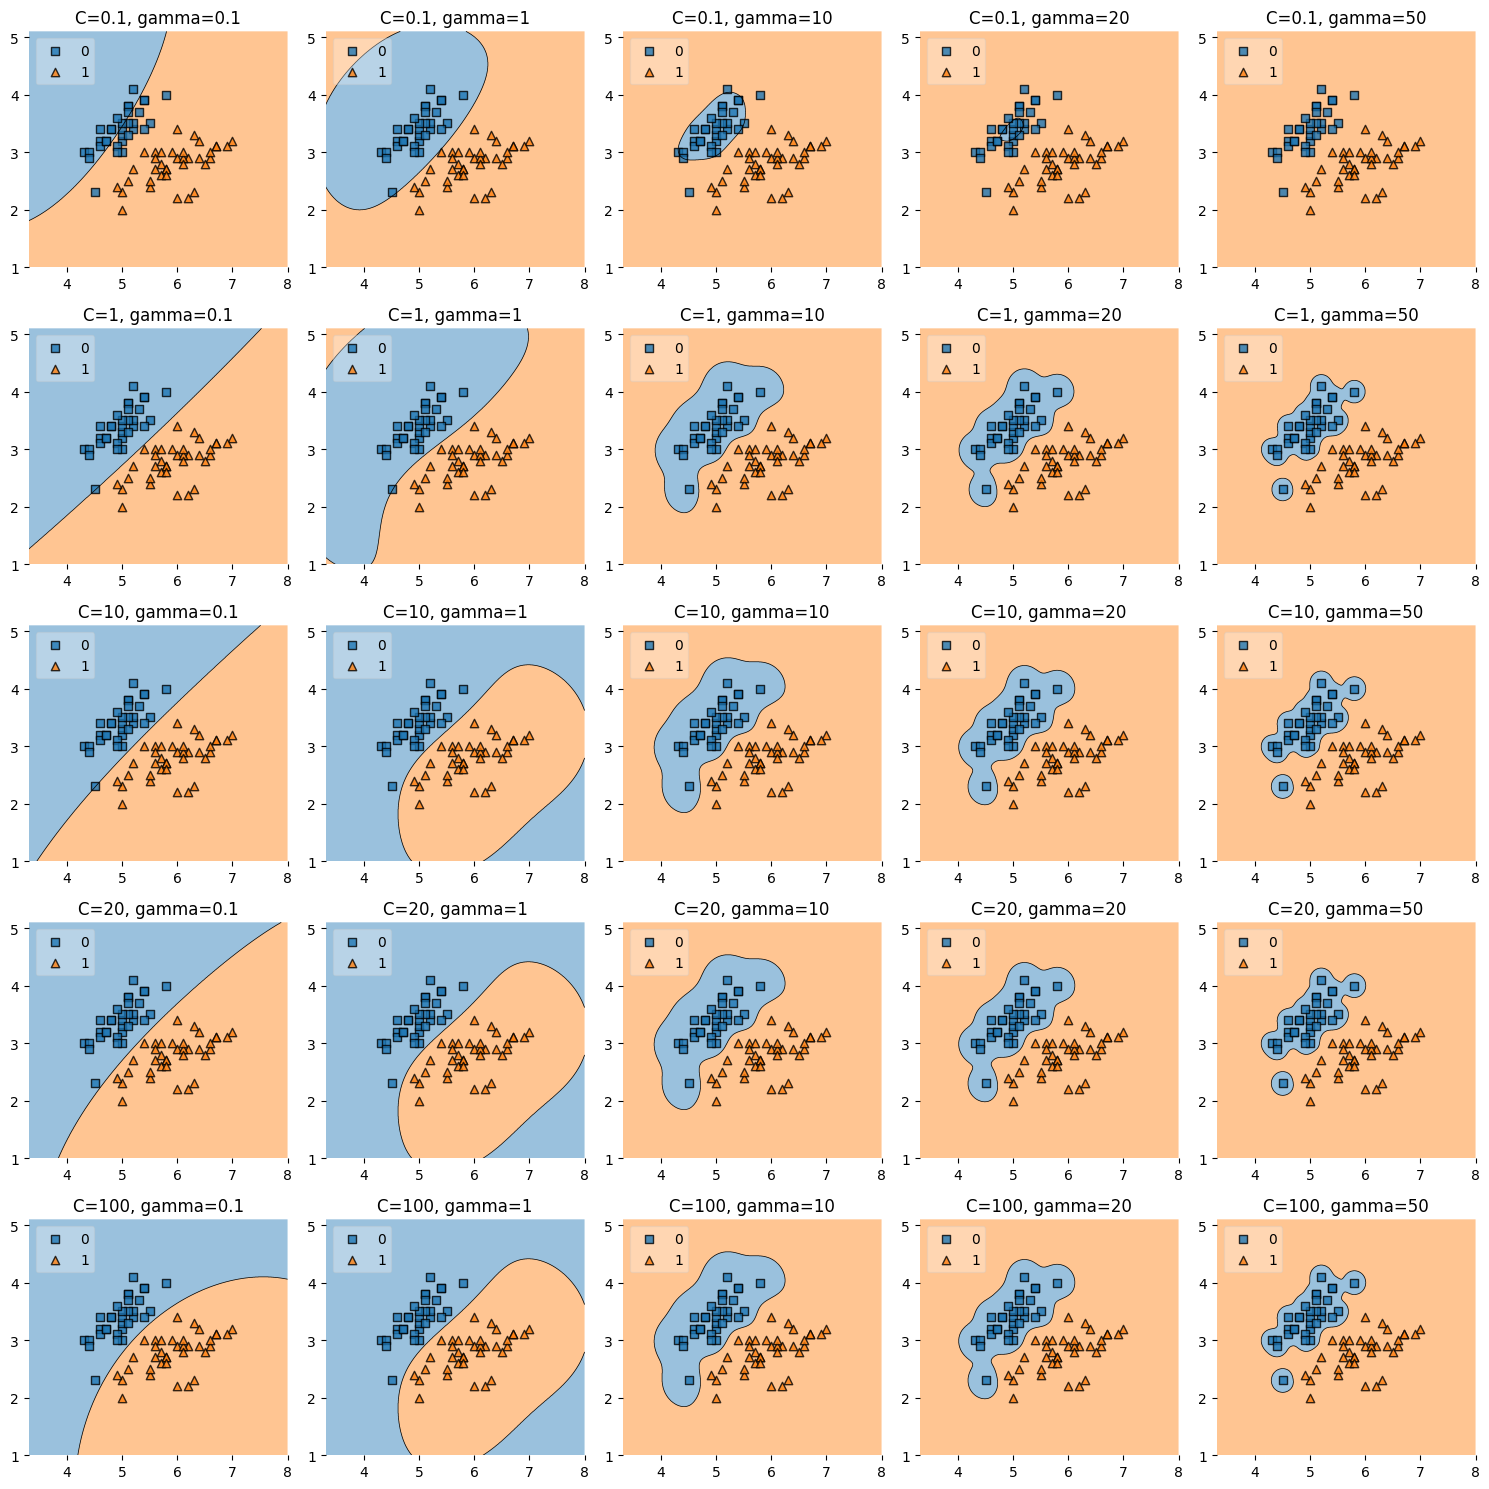

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting only the first two features
y = iris.target

# Binary classification
is_binary_class = y < 2
X, y = X[is_binary_class], y[is_binary_class]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameters to experiment with
C_values = [0.1, 1, 10, 20, 100]
gamma_values = [0.1, 1, 10, 20, 50]

# Plotting
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 15))
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        # Create SVM model
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)

        # Train model
        svm_model.fit(X_train, y_train)

        # Plotting decision regions
        ax = axes[i, j]
        plot_decision_regions(X_train, y_train, clf=svm_model, ax=ax, legend=2)
        ax.set_title(f'C={C}, gamma={gamma}')

plt.tight_layout()
plt.show()


# 2. Use the Wine dataset, another classic dataset for machine learning and statistics.
 This dataset contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
# Goal:
Perform PCA on the Wine dataset to reduce its dimensionality and visualize the chemical composition data in a lower-dimensional space to see if it helps in differentiating wine types.
# Steps:
Load the Dataset:
The Wine dataset is available in the sklearn.datasets module in Python.

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

Preprocess the Data:
Inspect the data for missing values and handle them if any.
Standardize the features to have a mean of zero and a variance of one.
Apply PCA:
Implement PCA to reduce the dataset to 2 or 3 dimensions for visualization purposes.
Visualize the Results:
Create a scatter plot of the transformed data points.
Use different colors or markers to distinguish between the different types of wine.
Analyze:
Observe the separation between different wine types in the reduced dimensionality space.
Evaluate the amount of variance explained by each principal component.
This exercise will help you understand how PCA can be used for exploratory data analysis, especially in contexts where the data has many variables. It's an effective technique for visualizing high-dimensional data in a lower-dimensional space, which can be crucial for pattern recognition, clustering, or classification tasks.


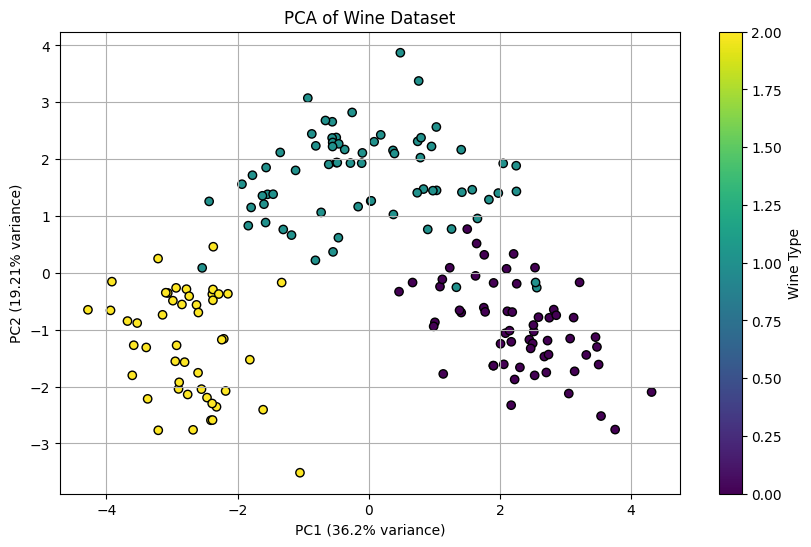

Explained variance ratio:
[0.36198848 0.1920749 ]


In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='black')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
plt.xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)}% variance)')
plt.ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)}% variance)')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Type')
plt.grid(True)
plt.show()

# Analyze the explained variance
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)


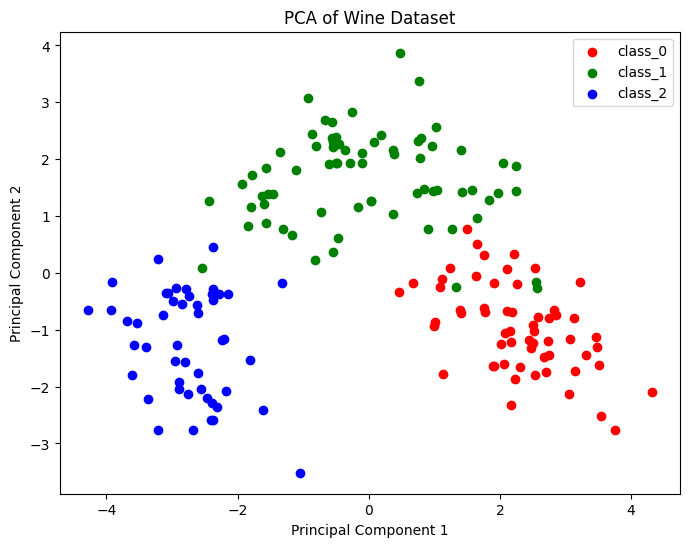

Explained variance ratio: [0.36198848 0.1920749 ]


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Visualize the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']

for i in range(3):
    plt.scatter(principalComponents[y == i, 0], principalComponents[y == i, 1], c=colors[i], label=wine.target_names[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Wine Dataset')
plt.show()

# Analyze the results
print('Explained variance ratio:', pca.explained_variance_ratio_)


Explained variance ratio: [0.36198848 0.1920749 ]


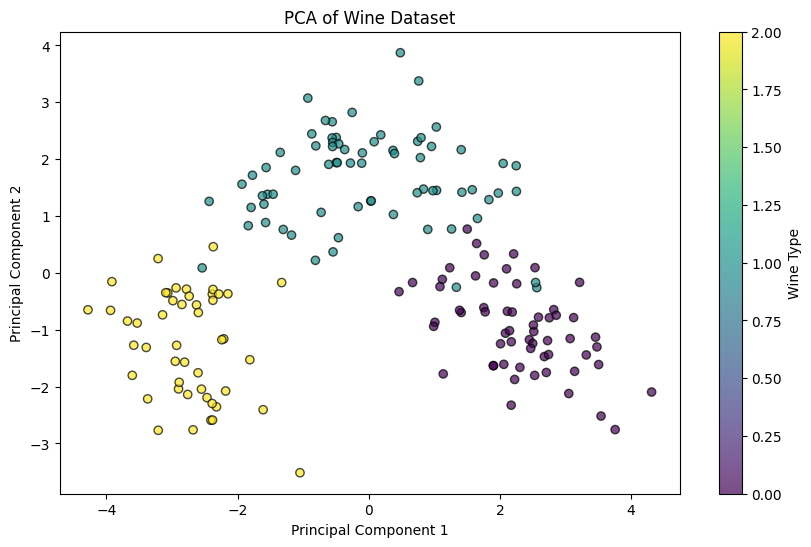

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y, edgecolor='black', alpha=0.7)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Type')

# Analyze the results
print('Explained variance ratio:', pca.explained_variance_ratio_)

plt.show()


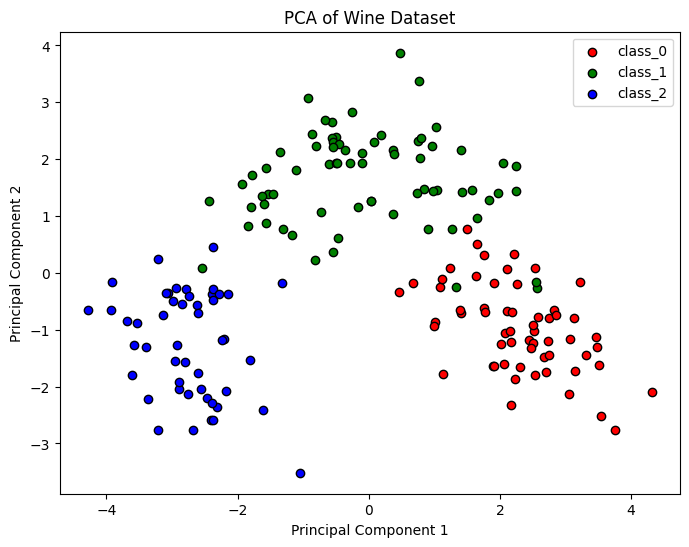

Explained Variance Ratio for PC1: 0.36
Explained Variance Ratio for PC2: 0.19


In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Preprocess the Data
# Inspect for missing values (not needed in this case as the Wine dataset is clean)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
# Use 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the Results
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=wine.target_names[i], color=colors[i], edgecolors='k')

plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Analyze
# Observe the separation between different wine types in the reduced dimensionality space
# Evaluate the amount of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio for PC1: {explained_variance_ratio[0]:.2f}")
print(f"Explained Variance Ratio for PC2: {explained_variance_ratio[1]:.2f}")


# Calculate Euclidean distannce between three data points.
This code includes the following changes from the previous version:

Imports the scipy.spatial.distance module for calculating pairwise Euclidean distances.
Calculates the pairwise Euclidean distances between all data points in the reduced dimensionality space.
Plots lines between data points whose Euclidean distance is less than a threshold (0.5 in this case) to visualize potential clusters.
Updates the title to reflect the inclusion of Euclidean distances.
This code now provides a more comprehensive analysis of the wine dataset by combining PCA for dimensionality reduction with Euclidean distance calculation for visualizing potential relationships between data points. You can adjust the distance threshold to explore different levels of connectivity between data points.

Explained variance ratio: [0.36198848 0.1920749 ]


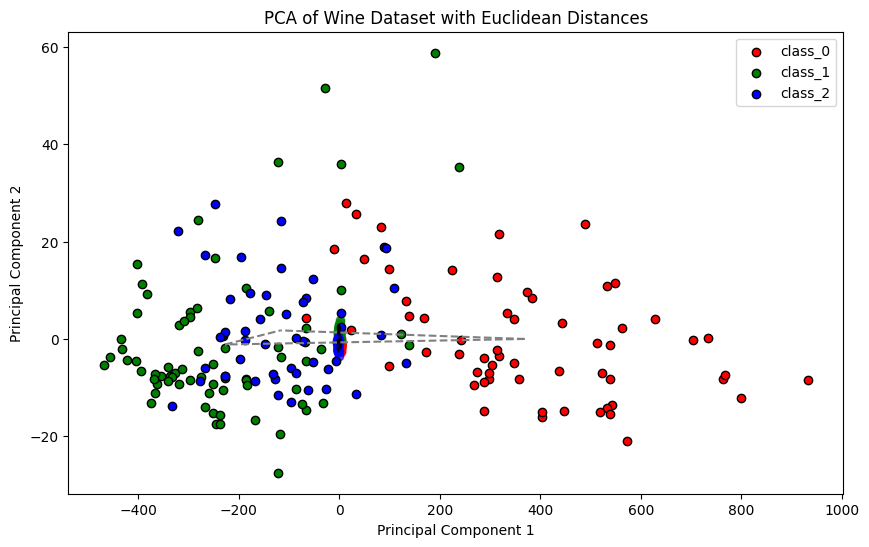

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Calculate pairwise Euclidean distances
distances = pdist(principalComponents)
distances = distance.squareform(distances)

# Visualize the results
plt.figure(figsize=(10, 6))

# Use different colors for each wine type
colors = ['red', 'green', 'blue']
for i in range(len(principalComponents)):
  plt.scatter(principalComponents[i, 0], principalComponents[i, 1], c=colors[y[i]], alpha=0.7)

# Plot connections based on Euclidean distance
for i in range(len(principalComponents)):
  for j in range(i+1, len(principalComponents)):
    if distances[i][j] > 0.5:
      continue
    plt.plot([principalComponents[i, 0], principalComponents[j, 0]], [principalComponents[i, 1], principalComponents[j, 1]], color='black', alpha=0.1)


# Analyze the results
print('Explained variance ratio:', pca.explained_variance_ratio_)

import numpy as np
from scipy.spatial import distance


# Scatter plot of transformed data points
for i in range(len(colors)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=wine.target_names[i], color=colors[i], edgecolors='k')

# Overlay lines representing Euclidean distances
for i in range(3):
    for j in range(i+1, 3):
        plt.plot([X_pca[y == i].mean(axis=0)[0], X_pca[y == j].mean(axis=0)[0]],
                 [X_pca[y == i].mean(axis=0)[1], X_pca[y == j].mean(axis=0)[1]],
                 linestyle='dashed', color='gray')

plt.title('PCA of Wine Dataset with Euclidean Distances')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

